In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import tensorflow as tf
import vgg16
import utils

In [3]:
from skimage import io
import matplotlib.pyplot as plt

In [4]:
!pip install scikit-image

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
fn1 ="./test_data/clock.jpeg"
#fn1 ="./test_data/puzzle.jpeg"
#fn1 ="./test_data/6201041_sd.jpg"
fn2 ="./test_data/bike.jpeg"
#fn2 = "./test_data/IMG_0358s.jpg"

In [6]:
i1 = io.imread(fn1)
i2 = io.imread(fn2)

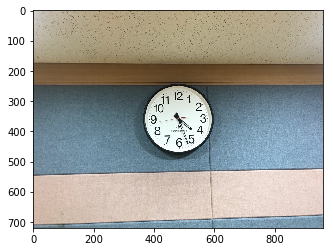

In [7]:
plt.imshow(i1)

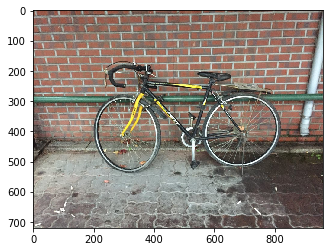

In [8]:
plt.imshow(i2)

In [9]:
img1 = utils.load_image(fn1)
img2 = utils.load_image(fn2)

# Just in case of using four-channel images
img1 = img1[:, :, :3]
img2 = img2[:, :, :3]

print(img1.shape)
print(img2.shape)

(224, 224, 3)
(224, 224, 3)


In [10]:
img1r = img1.reshape((1, 224, 224, 3))
img2r = img2.reshape((1, 224, 224, 3))

print(img1r.shape)
print(img2r.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [11]:
batch = np.concatenate((img1r, img2r), 0)
print(batch.shape)

(2, 224, 224, 3)


In [12]:
# !wget https://www.dropbox.com/s/8a8rei66f72um4i/vgg16.npy
vgg = vgg16.Vgg16('vgg16.npy')
#print(vgg.data_dict)

npy file loaded


In [13]:
images = tf.placeholder("float", [2, 224, 224, 3])

In [14]:
vgg.build(images)

build model started
build model finished: 13s


In [15]:
# initialize
sess = tf.InteractiveSession()

In [16]:
feed_dict = {images: batch}
prob = sess.run(vgg.prob, feed_dict=feed_dict)

In [17]:
print(prob[0])

[3.60534186e-10 9.82706472e-10 1.54953905e-09 9.02763087e-10
 9.17752874e-10 1.10963478e-08 1.15398446e-09 2.11024687e-09
 5.90787907e-09 7.42189088e-10 1.23263000e-09 6.67570932e-09
 1.73897767e-08 7.32058325e-09 7.69934694e-09 3.68605813e-09
 2.88870949e-09 1.82570226e-09 9.38477172e-08 3.23381322e-09
 2.62229932e-10 7.17362481e-09 6.65226167e-08 1.05731734e-08
 4.33417853e-08 1.03397770e-08 5.57886004e-09 3.03167091e-08
 5.67349456e-09 8.49678439e-10 1.52978152e-09 9.50419743e-09
 4.45783410e-09 3.19660742e-09 2.34850428e-09 5.64055025e-10
 1.19373169e-08 4.52418458e-09 1.81261530e-08 2.87349877e-09
 2.14769074e-08 5.66881120e-09 4.63043914e-09 5.72220360e-09
 7.23143279e-09 2.19153229e-09 1.49313397e-08 4.47162973e-09
 6.24952479e-10 9.51415569e-09 3.71801634e-09 1.29050459e-09
 4.77666191e-08 6.70063898e-08 1.52300970e-07 1.61233249e-09
 6.32294572e-08 4.78163686e-09 1.02184328e-09 1.16700454e-08
 2.15200558e-07 6.06776496e-08 1.42913494e-08 2.91159941e-09
 2.95369573e-09 8.700905

In [18]:
top1 = print_prob(prob[0], 'synset.txt')

NameError: name 'print_prob' is not defined

In [ ]:
print("Top1: {}".format(top1))

In [ ]:
print_prob(prob[1], 'synset.txt')